On importe les bibliothèques nécassaires:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import data
import skimage.io

1) Détection des galaxies par corrélation

On crée la PSF (Point Spread Function)

In [34]:
x, y = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
d = np.sqrt(x*x + y*y)
sigma, mu = 1.0, 0.0
psf = np.exp(-((d-mu)**2 / (2.0 * sigma**2)))

On charge l'image de la composante rouge du fond de ciel

In [35]:
fond_de_ciel = data.hubble_deep_field()
fond_de_ciel_crop = fond_de_ciel[0:512, 0:512, :]
fond_de_ciel_crop_rouge = fond_de_ciel_crop[:,:,0]

On fait la correlation entre la PSF et l'image

In [36]:
correlation = signal.correlate2d(fond_de_ciel_crop_rouge, psf, mode='same')

Puis on visualise les résultats:

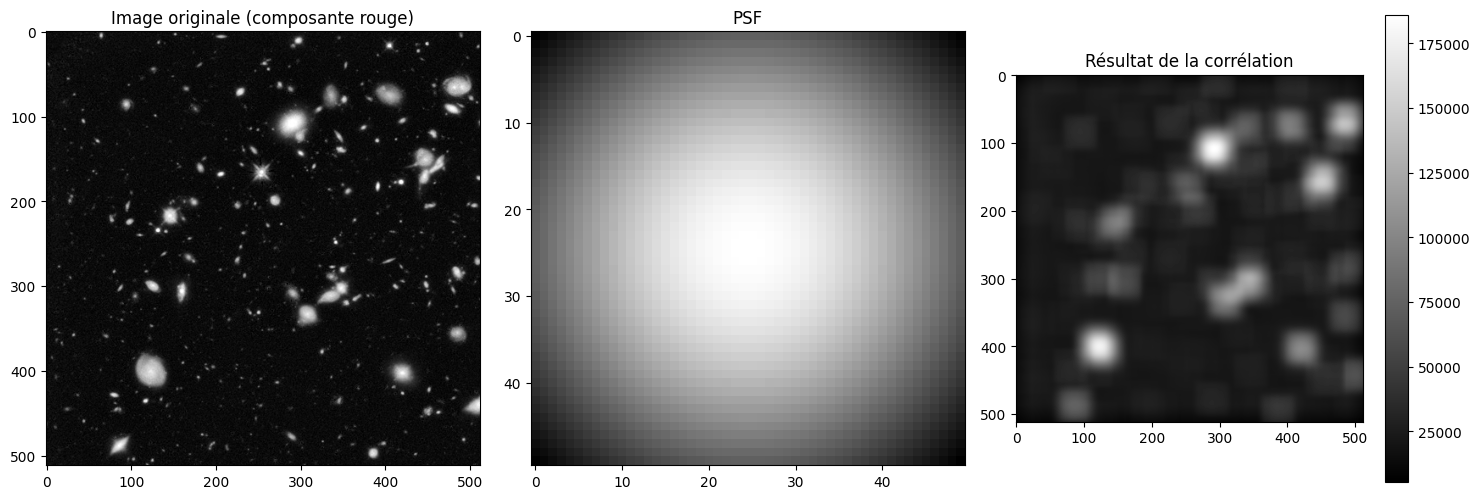

In [37]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title('Image originale (composante rouge)')
plt.imshow(fond_de_ciel_crop_rouge, cmap='gray')

plt.subplot(132)
plt.title('PSF')
plt.imshow(psf, cmap='gray')

plt.subplot(133)
plt.title('Résultat de la corrélation')
plt.imshow(correlation, cmap='gray')
plt.colorbar()

plt.tight_layout()

2) Transformée de Fourier

On calcule la TF de l'image d'origine:

In [38]:
ft_original = np.fft.fftshift(np.fft.fft2(fond_de_ciel_crop_rouge)) # calcule la Transformée de Fourier 2D de l'image

- np.fft.fft2() convertit l'image du domaine spatial au domaine fréquentiel et retourne un tableau de nombres complexes
- np.fft.fftshift() déplace les composantes de basse fréquence au centre de l'image. Par défaut, les basses fréquences sont aux coins. Cette fonction les réorganise pour une meilleure visualisation

La ligne suivante prépare les données pour la visualisation:

In [39]:
magnitude_spectrum_original = np.log(1 + np.abs(ft_original))

Elle compresse la plage dynamique dans une échelle logarithmique pour que les différences d'intensité ne soient pas trop importantes


On charge l'image du fichier npy et on calcule sa TF:

In [40]:
image_galaxies = np.load('image_galaxies.npy')
ft_galaxies = np.fft.fftshift(np.fft.fft2(image_galaxies))
magnitude_spectrum_galaxies = np.log(1 + np.abs(ft_galaxies))

On visualise les deux images d'origine ainsi que leur TF respectives:

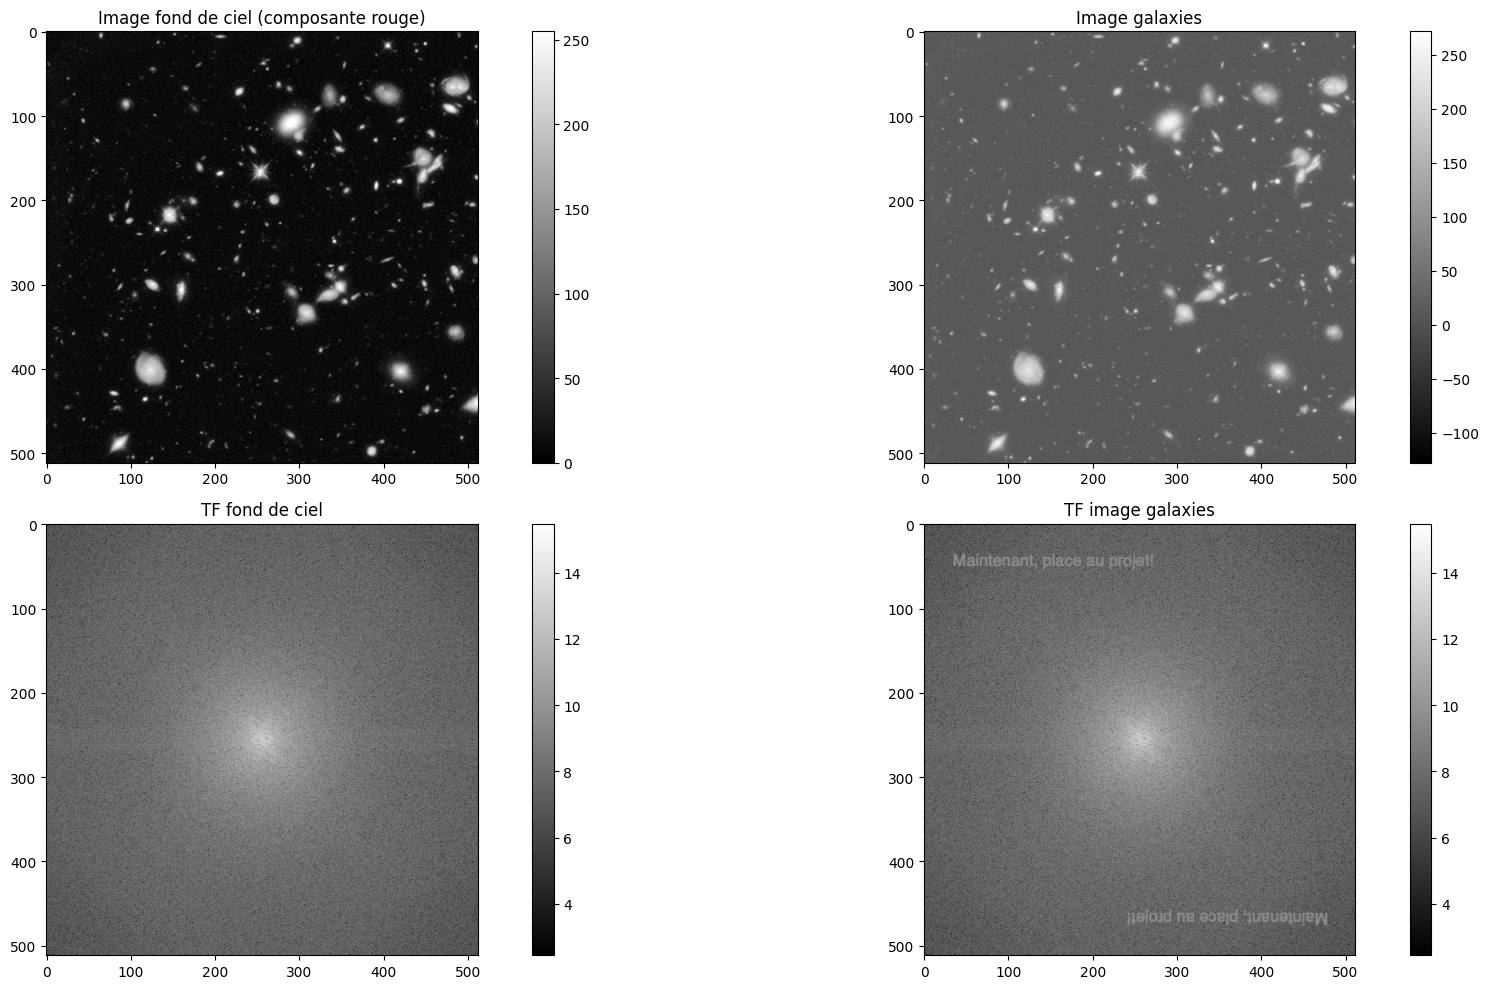

In [41]:
plt.figure(figsize=(20, 10))

# Images originales
plt.subplot(221)
plt.title('Image fond de ciel (composante rouge)')
plt.imshow(fond_de_ciel_crop_rouge, cmap='gray')
plt.colorbar()

plt.subplot(222)
plt.title('Image galaxies')
plt.imshow(image_galaxies, cmap='gray')
plt.colorbar()

# Transformées de Fourier
plt.subplot(223)
plt.title('TF fond de ciel')
plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.colorbar()

plt.subplot(224)
plt.title('TF image galaxies')
plt.imshow(magnitude_spectrum_galaxies, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

On peut apercevoir à droite un message caché. Pour mieux le voir, on va calculer la différence des deux images puis la fft de la différence :

In [42]:
difference = fond_de_ciel_crop_rouge - image_galaxies
ft_difference = np.fft.fftshift(np.fft.fft2(difference))
magnitude_spectrum_difference = np.log(1 + np.abs(ft_difference))

Puis on affiche:

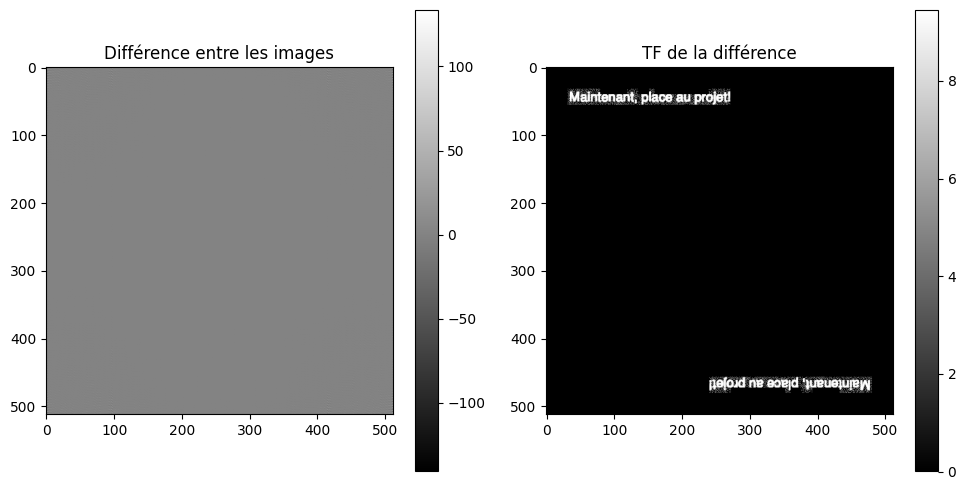

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title('Différence entre les images')
plt.imshow(difference, cmap='gray')
plt.colorbar()

plt.subplot(132)
plt.title('TF de la différence')
plt.imshow(magnitude_spectrum_difference, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()
